### Introduction to PageRank

The PageRank algorithm revolutionized how search engines rank web pages by assigning a numerical weight to each page based on its link structure. This project aims to implement and understand the iterative process of PageRank calculation.

For more details, refer to the [CS50 AI course project on PageRank](https://cs50.harvard.edu/ai/2024/projects/2/pagerank/) and watch this [YouTube video](https://www.youtube.com/watch?v=JGQe4kiPnrU) (see minute 12:50 for an animation of the algorithm).

### Code Overview

1. **Import Libraries and Define Constants**
    - Sets up the environment with necessary libraries and constants.
    
2. **Prepare the Corpus**
    - Functions to crawl and prepare the corpus for PageRank calculation.

3. **Initialize Results and Convergence Data**
    - Initializes dictionaries to store PageRank results and convergence data.
    - Defines a function to compute PageRank values iteratively until convergence.

4. **Validate Results**
    - Validates the computed PageRank results against expected values.

5. **Visualize Convergence**
    - Functions to visualize the convergence of PageRank values over iterations.

6. **Printing and Plotting Convergence Values**
    - Prints and plots convergence values for each HTML page in each corpus.

### Import Libraries and Define Constants

In [1]:
from pagerank import iterate_pagerank, crawl, sample_pagerank, DAMPING, SAMPLES
import numpy as np
import pytest as pt
import matplotlib.pyplot as plt

# Define the error tolerance for comparing sample and iterate results
TOLERANCE = 1e-3  

### Prepare the Corpus

In [2]:
# Prepare the corpus for PageRank calculation
def prepare_corpus(corpus_name):
    """
    Crawl the web data for the specified corpus name.
    
    Args:
        corpus_name (str): The name of the corpus to crawl.
        
    Returns:
        dict: A dictionary representing the crawled web data.
    """
    return crawl(corpus_name)


# Create dictionaries for different corpora by crawling the corresponding data
corpora = {
    "corpus0": prepare_corpus("corpus0"),
    "corpus1": prepare_corpus("corpus1"),
    "corpus2": prepare_corpus("corpus2")
}

### Initialize Results and Convergence Data

In [3]:
# Initialize dictionaries to store the results and convergence data for each corpus
results_iterate = {}
convergence_data = {}

# Function to compute PageRank values iteratively until convergence
def iterate_pagerank_with_convergence(corpus, damping_factor):
    """
    Compute PageRank values iteratively until convergence for a given corpus.
    
    Args:
        corpus (dict): A dictionary representing the corpus of web pages and their links.
        damping_factor (float): The damping factor to be applied in the PageRank calculation.
        
    Returns:
        tuple: A tuple containing the final PageRank values and the convergence data.
    """
    N = len(corpus)
    old_values = {}
    new_value = {}
    convergence_data = {page: [1 / N] for page in corpus}
    convergence_threshold = 0.001

    # Initialize the PageRank values with an equal probability of 1/N for each page
    for page in corpus:
        old_values[page] = 1 / N

    # Iteratively update PageRank values until convergence
    while True:
        for page in corpus:
            page_rank = 0
            for link in corpus:
                # Check if the current page is linked to by other pages
                if page in corpus[link]:
                    page_rank += old_values[link] / len(corpus[link])
                # If the current page has no links, interpret it as having one link for every other page
                if len(corpus[link]) == 0:
                    page_rank += old_values[link] / len(corpus)

            # Update the PageRank value for the current page using the damping factor
            page_rank *= damping_factor
            page_rank += (1 - damping_factor) / N

            # Update the new PageRank value
            new_value[page] = page_rank

        # Calculate the maximum change (difference) in PageRank values
        difference = max([abs(new_value[val] - old_values[val]) for val in old_values])
        
        # Track convergence data
        for page in new_value:
            convergence_data[page].append(new_value[page])

        # Check for convergence by comparing the maximum change with the convergence threshold
        if difference < convergence_threshold:
            break
        else:
            old_values = new_value.copy()

    return new_value, convergence_data

# Compute PageRank values and track convergence data for each corpus
for corpus_name, corpus in corpora.items():
    results_iterate[corpus_name], convergence_data[corpus_name] = iterate_pagerank_with_convergence(corpus, DAMPING)


### Validate Results

In [4]:
# Function to validate the computed PageRank results against expected values
def validate_results(results, expected_values, corpus_name):
    """
    Validate the computed PageRank results against expected values.
    
    Args:
        results (dict): The computed PageRank values.
        expected_values (dict): The expected PageRank values for validation.
        corpus_name (str): The name of the corpus being validated.
        
    Raises:
        AssertionError: If the computed PageRank values do not match the expected values within the tolerance.
    """
    pagerank_values = results
    for page in pagerank_values.keys():
        if not pagerank_values[page] == pt.approx(expected_values[page], abs=TOLERANCE):
            print(f"Mismatch found in {corpus_name}:")
            print(f"Page: {page}, Computed: {pagerank_values[page]}, Expected: {expected_values[page]}")
        assert pagerank_values[page] == pt.approx(expected_values[page], abs=TOLERANCE)
    print(f"Validation for {corpus_name} passed!")

# Define expected PageRank values for corpus0
# Reference: https://cs50.harvard.edu/ai/2024/projects/2/pagerank/
expected_corpus0 = {"1.html": 0.2202, "2.html": 0.4289, "3.html": 0.2202, "4.html": 0.1307}

# Validate the computed PageRank results for corpus0
validate_results(results_iterate["corpus0"], expected_corpus0, "corpus0")


Validation for corpus0 passed!


### Visualize Convergence

Note: Some values may overlap on the plots and might not be distinctly visible.

----------------------------------------------------------------------------------------------------
Plotting 4.html for corpus0:
4.html - First 3 values: [0.25, 0.14375, 0.09859375000000001]
4.html - Last 3 values: [0.13151666128057002, 0.13069955559849183, 0.13108768079747898]
----------------------------------------------------------------------------------------------------
Plotting 2.html for corpus0:
2.html - First 3 values: [0.25, 0.56875, 0.34296875000000004]
2.html - Last 3 values: [0.4298971947265272, 0.42888782888396004, 0.429357664651155]
----------------------------------------------------------------------------------------------------
Plotting 1.html for corpus0:
1.html - First 3 values: [0.25, 0.14375, 0.27921874999999996]
1.html - Last 3 values: [0.21929307199645137, 0.22020630775877406, 0.21977732727568303]
----------------------------------------------------------------------------------

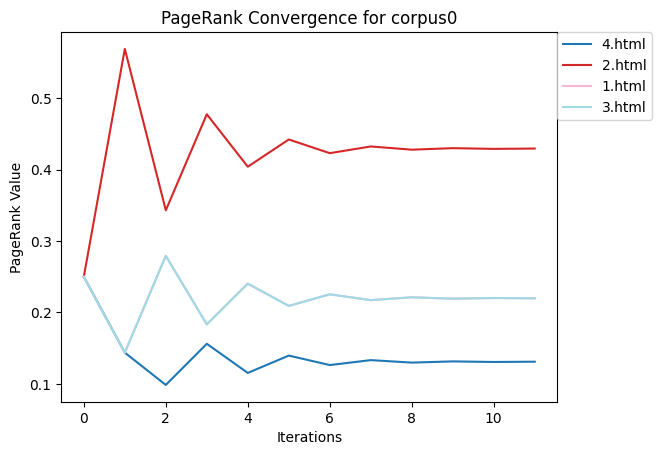

----------------------------------------------------------------------------------------------------
Plotting bfs.html for corpus1:
bfs.html - First 3 values: [0.14285714285714285, 0.12261904761904761, 0.1226190476190476]
bfs.html - Last 3 values: [0.11545127452569968, 0.11512918389133905, 0.11519331778723374]
----------------------------------------------------------------------------------------------------
Plotting tictactoe.html for corpus1:
tictactoe.html - First 3 values: [0.14285714285714285, 0.08214285714285714, 0.13374999999999998]
tictactoe.html - Last 3 values: [0.11748369692293917, 0.1182712503759983, 0.1179705034351374]
----------------------------------------------------------------------------------------------------
Plotting minimax.html for corpus1:
minimax.html - First 3 values: [0.14285714285714285, 0.12261904761904761, 0.13122023809523808]
minimax.html - Last 3 values: [0.13161694604459762, 0.13054228754668237, 0.1311986197463989]
-----------------------------------

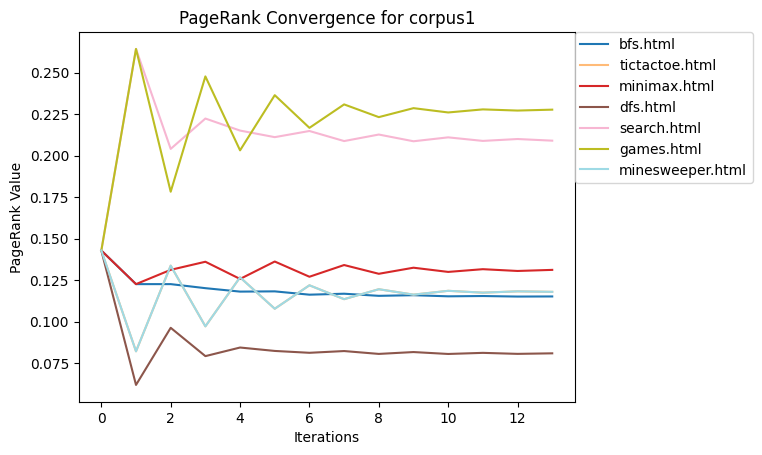

----------------------------------------------------------------------------------------------------
Plotting algorithms.html for corpus2:
algorithms.html - First 3 values: [0.125, 0.08515625, 0.1091455078125]
algorithms.html - Last 3 values: [0.1063743108375996, 0.10670120740257664, 0.10643497959132336]
----------------------------------------------------------------------------------------------------
Plotting c.html for corpus2:
c.html - First 3 values: [0.125, 0.08515625, 0.1317236328125]
c.html - Last 3 values: [0.12370788511039106, 0.12425784617284963, 0.12381142497842636]
----------------------------------------------------------------------------------------------------
Plotting recursion.html for corpus2:
recursion.html - First 3 values: [0.125, 0.08515625, 0.0639892578125]
recursion.html - Last 3 values: [0.07173230488238355, 0.07158063949973309, 0.07170345609294171]
----------------------------------------------------------------------------------------------------
Plotting 

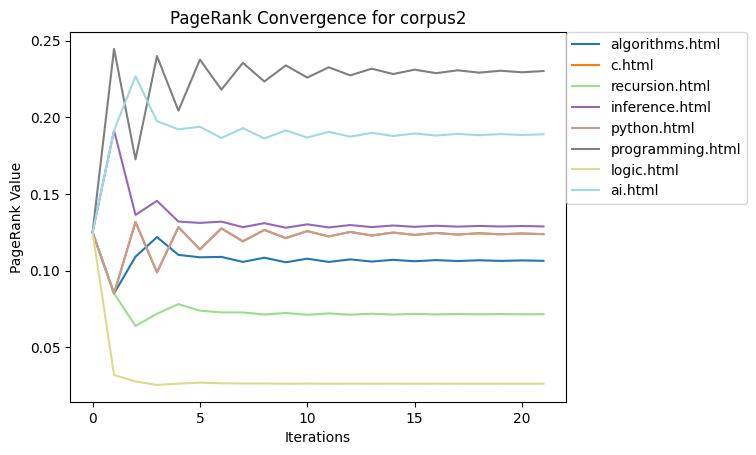

In [5]:
def visualize_convergence(convergence_data, corpus_name):
    """
    Visualize the convergence of PageRank values over iterations for a given corpus.
    
    Args:
        convergence_data (dict): A dictionary containing convergence data for each page.
        corpus_name (str): The name of the corpus being visualized.
    """
    iterations = list(range(len(next(iter(convergence_data.values())))))
    color_map = plt.get_cmap('tab20')
    colors = color_map(np.linspace(0, 1, len(convergence_data)))
    
    for (page, values), color in zip(convergence_data.items(), colors):
        print(100 * '-')
        print(f"Plotting {page} for {corpus_name}:")
        print(f"{page} - First 3 values: {values[:3]}")
        print(f"{page} - Last 3 values: {values[-3:]}")
        plt.plot(iterations, values, linestyle='-', color=color, label=f'{page}')
    
    plt.xlabel('Iterations')
    plt.ylabel('PageRank Value')
    plt.title(f'PageRank Convergence for {corpus_name}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)


def plot_all_convergences(convergence_data):
    """
    Plot convergence lines for all corpora.
    
    Args:
        convergence_data (dict): A dictionary containing convergence data for all corpora.
    """
    print("Note: Some values may overlap on the plots and might not be distinctly visible.")
    print()
    
    for corpus_name in convergence_data.keys():
        plt.figure()
        visualize_convergence(convergence_data[corpus_name], corpus_name)
        plt.show()
        

# Plot convergence data for all corpora
plot_all_convergences(convergence_data)


### Printing and Plotting Convergence Values


--- Convergence values for corpus0 ---

Page: 4.html
Values from start to finish: [0.25, 0.14375, 0.09859375000000001, 0.15616796875, 0.11538623046875002, 0.13965136474609374, 0.12639220208740234, 0.1332796004684448, 0.12982024809978487, 0.13151666128057002, 0.13069955559849183, 0.13108768079747898]

Page: 2.html
Values from start to finish: [0.25, 0.56875, 0.34296875000000004, 0.4773085937499999, 0.40390146484375, 0.4420323901367187, 0.42288026629638675, 0.4322721731796264, 0.4277484046975326, 0.4298971947265272, 0.42888782888396004, 0.429357664651155]

Page: 1.html
Values from start to finish: [0.25, 0.14375, 0.27921874999999996, 0.18326171875000002, 0.24035615234374996, 0.20915812255859376, 0.22536376580810544, 0.21722411317596438, 0.22121567360134123, 0.21929307199645137, 0.22020630775877406, 0.21977732727568303]

Page: 3.html
Values from start to finish: [0.25, 0.14375, 0.27921874999999996, 0.18326171875000002, 0.24035615234374996, 0.20915812255859376, 0.22536376580810544, 0.2172

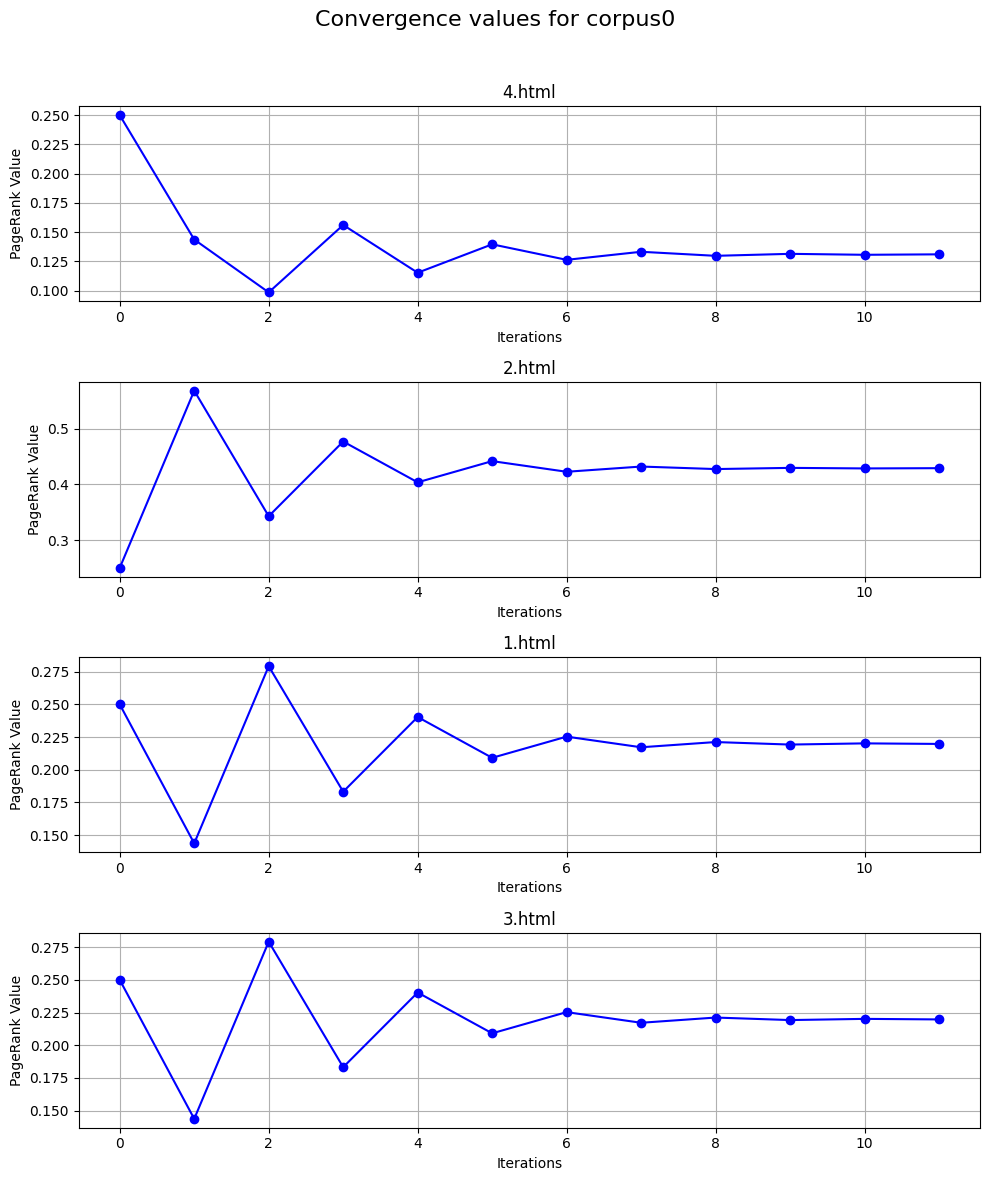


--- Convergence values for corpus1 ---

Page: bfs.html
Values from start to finish: [0.14285714285714285, 0.12261904761904761, 0.1226190476190476, 0.12018204365079366, 0.11811059027777776, 0.11825731822503308, 0.11626181814236113, 0.11683604407760917, 0.11556325020651897, 0.11594674662928084, 0.115271745054654, 0.11545127452569968, 0.11512918389133905, 0.11519331778723374]

Page: tictactoe.html
Values from start to finish: [0.14285714285714285, 0.08214285714285714, 0.13374999999999998, 0.09719494047619048, 0.12671315104166664, 0.10778524584573414, 0.12190964486839656, 0.11354803182666921, 0.11954593214839955, 0.11628913797839834, 0.11858676557535314, 0.11748369692293917, 0.1182712503759983, 0.1179705034351374]

Page: minimax.html
Values from start to finish: [0.14285714285714285, 0.12261904761904761, 0.13122023809523808, 0.13609424603174602, 0.12573697916666665, 0.13622802739541998, 0.12706119889064568, 0.13411534364903901, 0.1288420722863659, 0.13250550031933725, 0.12997277505405963,

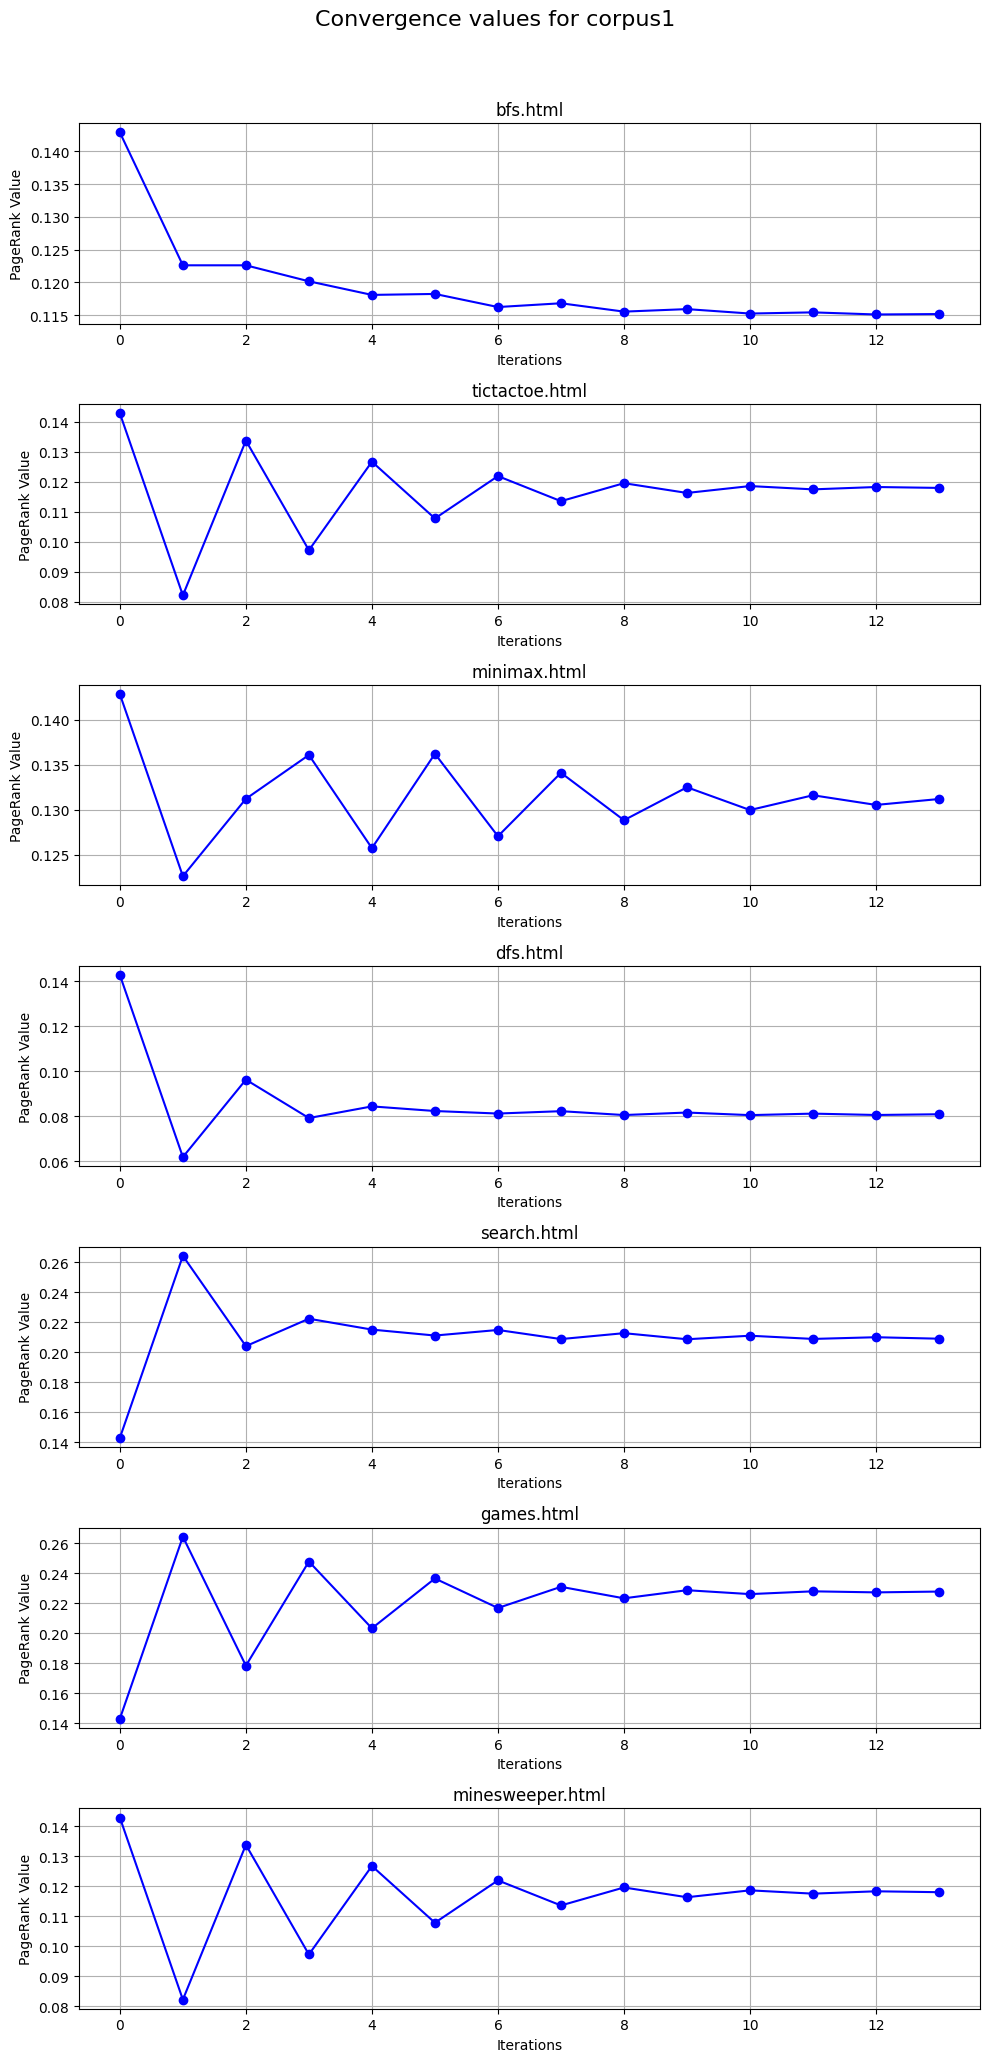


--- Convergence values for corpus2 ---

Page: algorithms.html
Values from start to finish: [0.125, 0.08515625, 0.1091455078125, 0.12188980102539063, 0.11030842456817627, 0.10870553100228307, 0.10898194339657574, 0.1057364502812902, 0.10846354759284949, 0.10548079754640505, 0.10781482956629264, 0.10570108149125748, 0.10736272890379014, 0.10595499801840406, 0.1070765892691401, 0.10614871183035114, 0.10689472930711792, 0.10628339125680591, 0.10677756504725591, 0.1063743108375996, 0.10670120740257664, 0.10643497959132336]

Page: c.html
Values from start to finish: [0.125, 0.08515625, 0.1317236328125, 0.09888833618164061, 0.12834358386993405, 0.11387691934227943, 0.1275765074750259, 0.11913519868654183, 0.12655708959119438, 0.12125001672367865, 0.12580960656406368, 0.12231753427011263, 0.12524976057482576, 0.12292928343996966, 0.12484785503726126, 0.12330763484436522, 0.12457044636589922, 0.12355005568423008, 0.12438303890026921, 0.12370788511039106, 0.12425784617284963, 0.1238114249784263

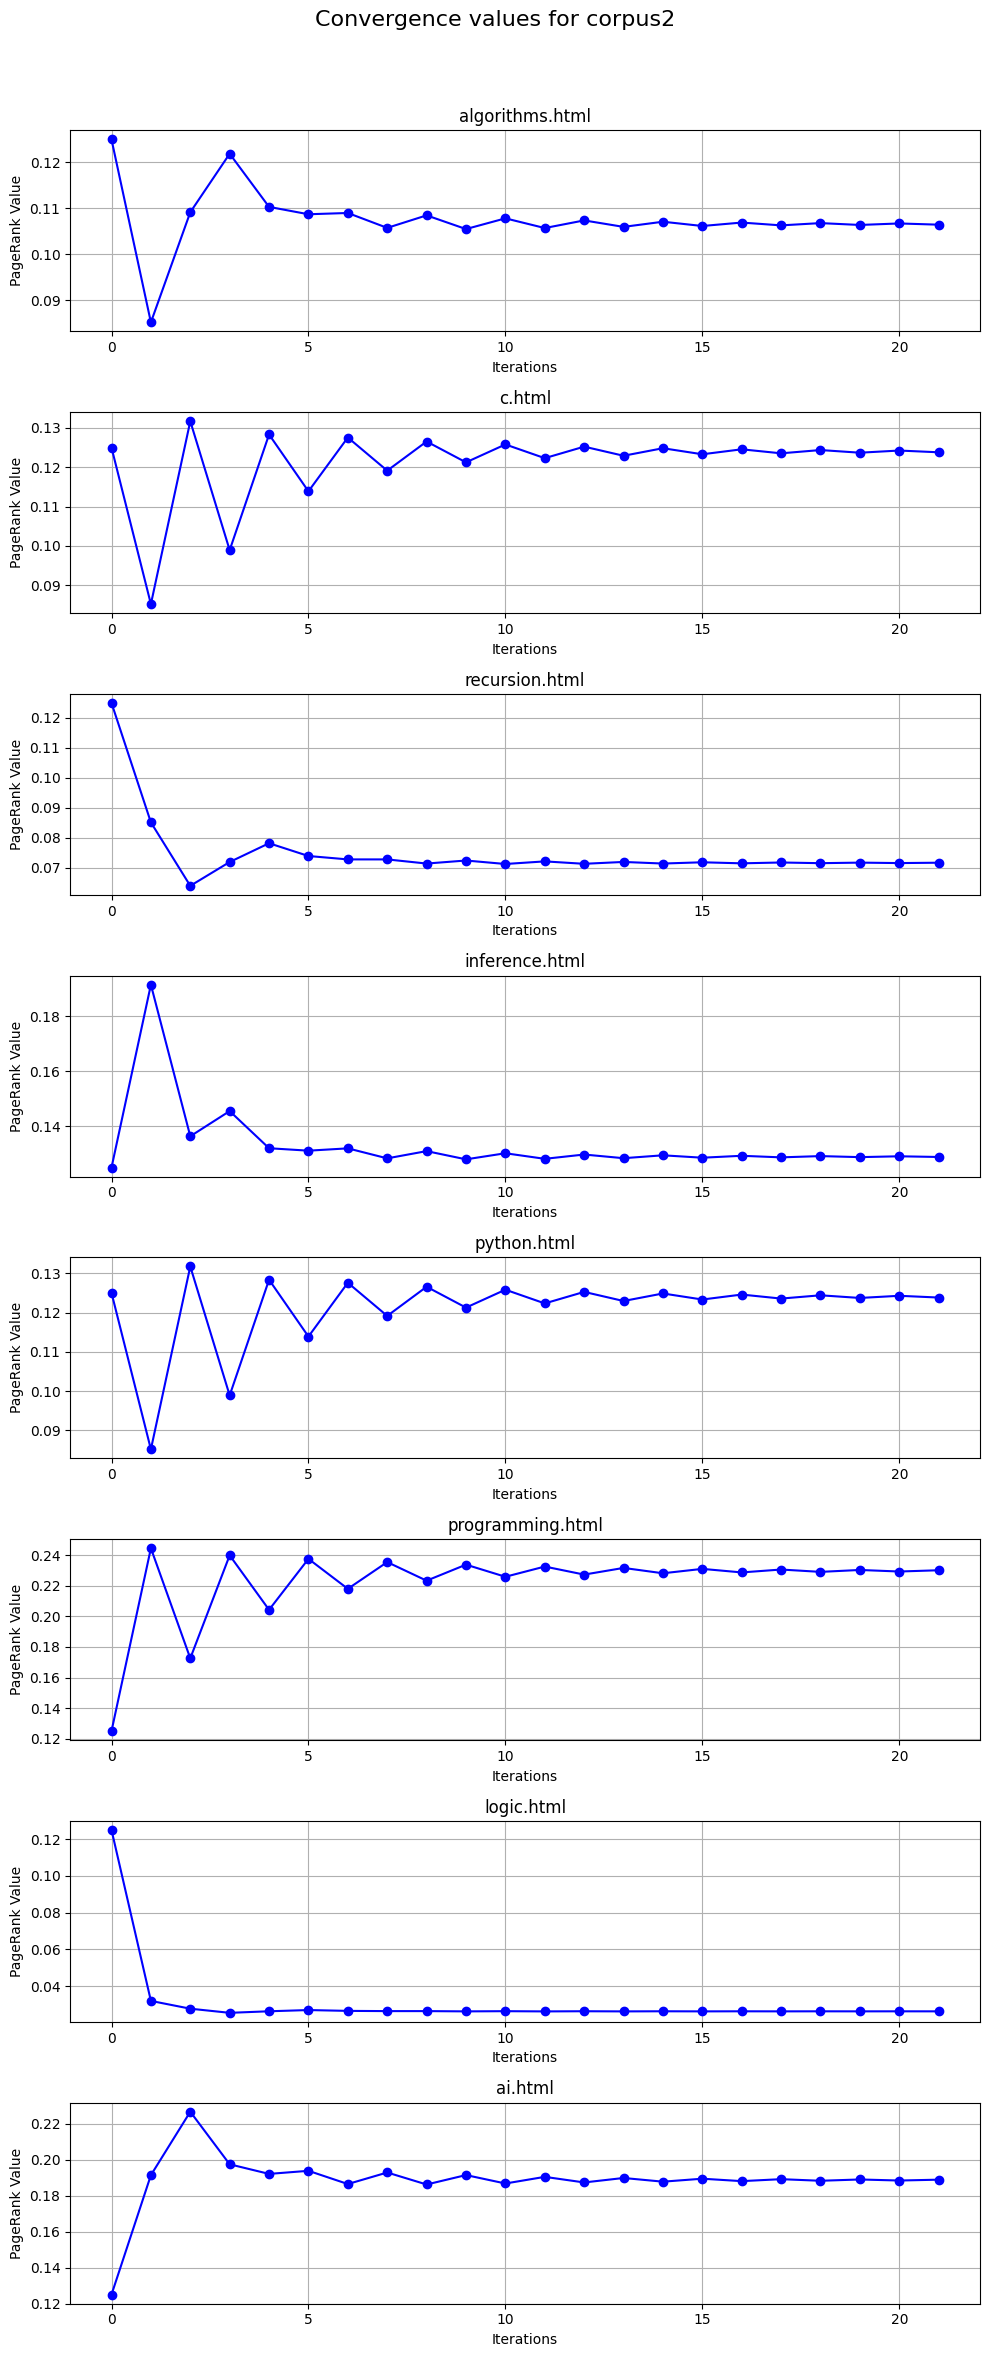

In [6]:
# Function to print and plot convergence values for each HTML page in each corpus
def print_and_plot_convergence_values(convergence_data):
    """
    Print the convergence values and plot small graphics for each HTML page in each corpus.
    
    Args:
        convergence_data (dict): A dictionary containing convergence data for each corpus.
    """
    for corpus_name, pages_data in convergence_data.items():
        print(f"\n--- Convergence values for {corpus_name} ---")
        fig, axes = plt.subplots(len(pages_data), 1, figsize=(10, len(pages_data) * 3))
        fig.suptitle(f'Convergence values for {corpus_name}', fontsize=16)
        
        if len(pages_data) == 1:
            axes = [axes]
        
        for i, (page, values) in enumerate(pages_data.items()):
            print(f"\nPage: {page}")
            print(f"Values from start to finish: {values}")
            
            iterations = list(range(len(values)))
            axes[i].plot(iterations, values, linestyle='-', marker='o', color='blue')
            axes[i].set_title(page)
            axes[i].set_xlabel('Iterations')
            axes[i].set_ylabel('PageRank Value')
            axes[i].grid(True)
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

# Print and plot convergence values for each HTML page in each corpus
print_and_plot_convergence_values(convergence_data)
